In [14]:
pip install spacy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 5.2 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.0/493.0 KB 9.2 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 KB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.9/394.9 KB 5.0 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.9/156.9 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.3/922.3 KB 5.3 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

/tmp/ipykernel_32239/2536081639.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender_Age_Category', data=all_data[all_data['Survived'] == 1], palette='pastel')


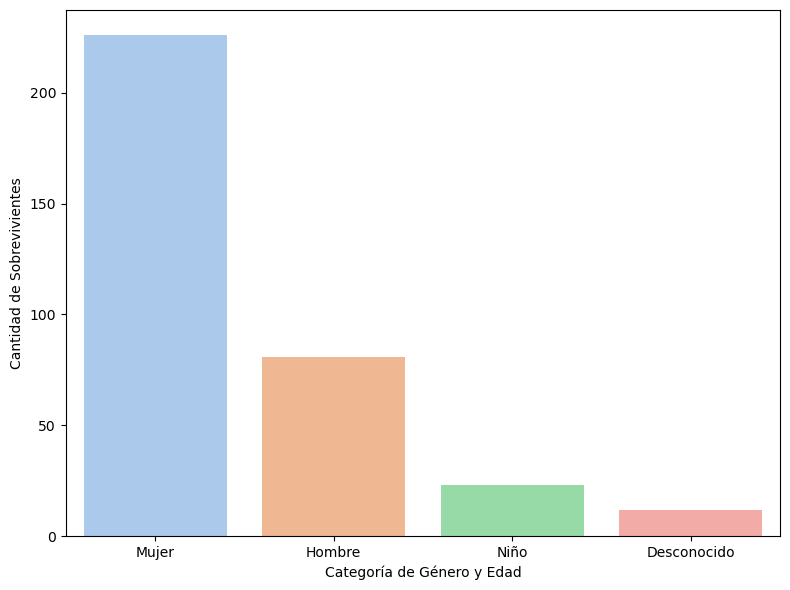

Cantidad de Sobrevivientes por Género y Edad:
Gender_Age_Category
Mujer          226
Hombre          81
Niño            23
Desconocido     12
Name: count, dtype: int64


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy

# Cargar el modelo en español de spaCy
nlp = spacy.load("es_core_news_sm")

# Cargar los datos del Titanic
train_data = pd.read_csv("titanic/train.csv")
test_data = pd.read_csv("titanic/test.csv")

# Combinar los datos de entrenamiento y prueba
all_data = pd.concat([train_data, test_data], ignore_index=True)

# Función para determinar el género y la edad aproximada
def categorize_gender_age(name):
    name = name.lower()
    if 'mr.' in name:
        return 'Hombre'
    elif 'mrs.' in name or 'miss.' in name:
        return 'Mujer'
    elif 'master.' in name or 'boy' in name or 'baby' in name:
        return 'Niño'
    return 'Desconocido'

# Aplicar la función a cada fila
all_data['Gender_Age_Category'] = all_data['Name'].apply(categorize_gender_age)

# Contar la cantidad de sobrevivientes por categoría de género y edad
survivors_count = all_data[all_data['Survived'] == 1]['Gender_Age_Category'].value_counts()

# Visualización de la cantidad de sobrevivientes por género y edad
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender_Age_Category', data=all_data[all_data['Survived'] == 1], palette='pastel')
#plt.title('Cantidad de Sobrevivientes por Género y Edad')
plt.xlabel('Categoría de Género y Edad')
plt.ylabel('Cantidad de Sobrevivientes')
plt.tight_layout()
plt.show()

# Imprimir los resultados
print("Cantidad de Sobrevivientes por Género y Edad:")
print(survivors_count)


/tmp/ipykernel_32239/4020178954.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words], palette='pastel')


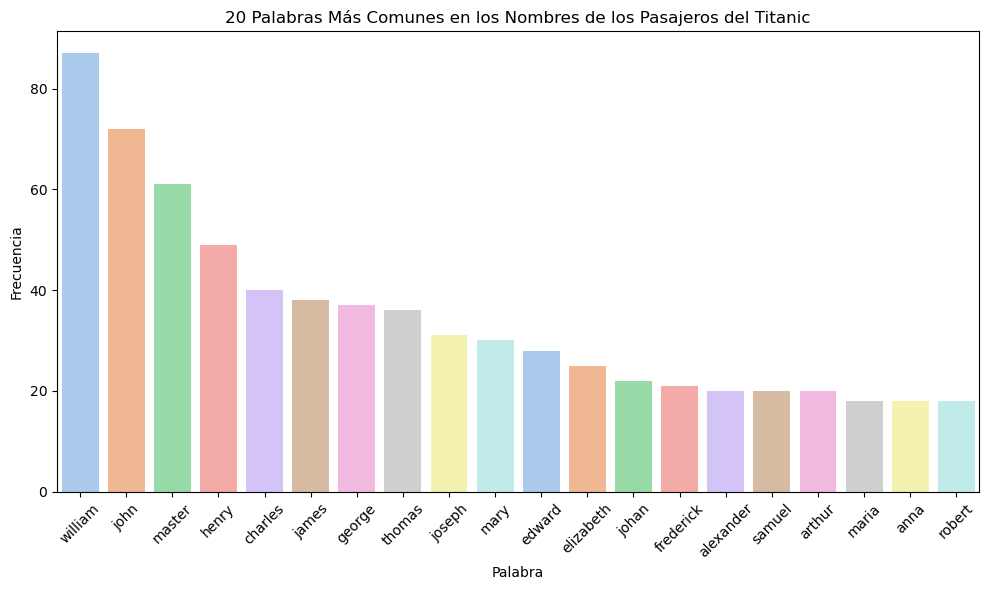

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import spacy

# Cargar los datos del Titanic
train_data = pd.read_csv("titanic/train.csv")
test_data = pd.read_csv("titanic/test.csv")

# Combinar los datos de entrenamiento y prueba
all_data = pd.concat([train_data, test_data], ignore_index=True)

# Cargar el modelo de lenguaje de spaCy para procesar nombres en inglés
nlp = spacy.load("en_core_web_sm")

# Función para procesar y limpiar los nombres utilizando spaCy
def process_names(name):
    doc = nlp(name)
    tokens = [token.text.lower() for token in doc if token.is_alpha and not token.is_stop]
    return tokens

# Aplicar la función a cada nombre y combinar los tokens en una lista
all_data['Name_Tokens'] = all_data['Name'].apply(process_names)
all_tokens = [token for name_tokens in all_data['Name_Tokens'] for token in name_tokens]

# Contar la frecuencia de cada palabra
word_freq = Counter(all_tokens)

# Seleccionar las palabras más comunes
common_words = word_freq.most_common(20)

# Visualización de las palabras más comunes
plt.figure(figsize=(10, 6))
sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words], palette='pastel')
plt.title('20 Palabras Más Comunes en los Nombres de los Pasajeros del Titanic')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:
# Importar bibliotecas necesarias
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

# Definir función para tokenizar texto por palabras
def tokenize_words(text):
    return word_tokenize(text)

# Definir función para tokenizar texto por frases
def tokenize_sentences(text):
    return sent_tokenize(text)

# Texto de ejemplo
texto_ejemplo = "Este es un ejemplo de texto. Incluye varias frases y palabras diferentes."

# Tokenizar texto por palabras
tokens_palabras = tokenize_words(texto_ejemplo)
print("Tokens por palabras:", tokens_palabras)

# Tokenizar texto por frases
tokens_frases = tokenize_sentences(texto_ejemplo)
print("Tokens por frases:", tokens_frases)


Tokens por palabras: ['Este', 'es', 'un', 'ejemplo', 'de', 'texto', '.', 'Incluye', 'varias', 'frases', 'y', 'palabras', 'diferentes', '.']
Tokens por frases: ['Este es un ejemplo de texto.', 'Incluye varias frases y palabras diferentes.']
